In [2]:
import numpy as np

In [3]:
import pandas as pd

In [30]:
import array 

In [4]:
ph=pd.read_csv("president_heights.csv")

In [5]:
ph.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [6]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


# 목표   
-시대별 미국 대통령들의 평균 신장 파악한 후 변화 원인에 대한 탐구와 분석.   
-정당별 대통령 분류 후, 신장 차이점 파악.

*이전에 실시한 중복되는 내용들은 생략

#### 기초 분석

In [7]:
ph

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [8]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [9]:
ph.dtypes

order          int64
name          object
height(cm)     int64
dtype: object

In [10]:
ph.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [11]:
ph.describe()

,order,height(cm)
count,42.000000,42.000000
mean,22.476190,179.738095
std,13.152461,7.015869
min,1.000000,163.000000
25%,11.250000,174.250000
50%,22.000000,182.000000
75%,33.750000,183.000000
max,44.000000,193.000000


### 시대구분   

-10년 단위로 구분을 하려고 하였으나, 지나치게 많은 그룹이 형성되어서 통상적인 한 세대인 30년을 기준으로 그룹화 진행.   
-퇴임일이 애매한 경우, 취임년도를 우선하여서 그룹화.   
-g7 그룹 이후 충분한 숫자가 누적되지 않아서 합산하여 계산.   

-g1: 1790 ~ 1820, 1 ~ 5대.   
-g2: 1820 ~ 1850, 6 ~ 13대.   
-g3: 1850 ~ 1880, 14 ~ 19대.    
-g4: 1880 ~ 1910, 20 ~ 27대.   
-g5: 1910 ~ 1940, 28 ~ 32대.    
-g6: 1940 ~ 1970, 33 ~ 37대.    
-g7: 1970 ~ 2017  38 ~ 44대.    

In [12]:
g1=ph.iloc[0:4]
g2=ph.iloc[5:12]
g3=ph.iloc[13:18]
g4=ph.iloc[19:26]
g5=ph.iloc[27:31]
g6=ph.iloc[32:36]
g7=ph.iloc[37:44]

In [13]:
g1.describe()

,order,height(cm)
count,4.000000,4.000000
mean,2.500000,177.750000
std,1.290994,13.301002
min,1.000000,163.000000
25%,1.750000,168.250000
50%,2.500000,179.500000
75%,3.250000,189.000000
max,4.000000,189.000000


In [14]:
g2.describe()

,order,height(cm)
count,7.000000,7.000000
mean,9.000000,175.142857
std,2.160247,6.335839
min,6.000000,168.000000
25%,7.500000,172.000000
50%,9.000000,173.000000
75%,10.500000,178.000000
max,12.000000,185.000000


In [15]:
g3.describe()

,order,height(cm)
count,5.000000,5.000000
mean,16.000000,181.000000
std,1.581139,7.582875
min,14.000000,173.000000
25%,15.000000,178.000000
50%,16.000000,178.000000
75%,17.000000,183.000000
max,18.000000,193.000000


In [16]:
g4.describe()

,order,height(cm)
count,7.000000,7.000000
mean,24.285714,177.714286
std,3.039424,6.237368
min,20.000000,168.000000
25%,22.000000,174.000000
50%,25.000000,180.000000
75%,26.500000,182.500000
max,28.000000,183.000000


In [17]:
g5.describe()

,order,height(cm)
count,4.000000,4.000000
mean,31.500000,180.750000
std,1.290994,5.619905
min,30.000000,175.000000
25%,30.750000,177.250000
50%,31.500000,180.000000
75%,32.250000,183.500000
max,33.000000,188.000000


In [18]:
g6.describe()

,order,height(cm)
count,4.000000,4.000000
mean,36.500000,185.250000
std,1.290994,5.188127
min,35.000000,182.000000
25%,35.750000,182.750000
50%,36.500000,183.000000
75%,37.250000,185.500000
max,38.000000,193.000000


In [19]:
g7.describe()

,order,height(cm)
count,5.000000,5.00000
mean,42.000000,185.60000
std,1.581139,2.50998
min,40.000000,182.00000
25%,41.000000,185.00000
50%,42.000000,185.00000
75%,43.000000,188.00000
max,44.000000,188.00000


g1(1790 ~ 1820)는 177cm,    
g2(1820 ~ 1850)는 175cm,    
g3(1850 ~ 1880)는 181cm,   
g4(1880 ~ 1910)는 177cm,    
g5(1910 ~ 1940)는 180cm,    
g6(1940 ~ 1970)는 185cm,    
g7(1970 ~ 2017)는 185cm가 평균신장인 것으로 나타났다.

In [20]:
g1t=177
g2t=175
g3t= 181
g4t= 177
g5t=180
g6t=185
g7t=185

In [21]:
phline=pd.DataFrame({'g1t':[177],'g2t':[175],'g3t':[181],'g4t':[177],'g5t':[180],'g6t':[185],'g7t':[185]})
phline

,g1t,g2t,g3t,g4t,g5t,g6t,g7t
0,177,175,181,177,180,185,185


In [22]:
phline=phline.T
phline.head()

,0
g1t,177
g2t,175
g3t,181
g4t,177
g5t,180


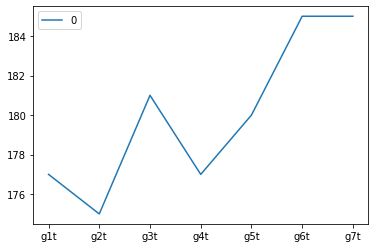

In [23]:
phline.plot()

해당 시대별 대통령 신장을 그래프로 정리하면 다음과 같다. 전반적으로 상승하던 추세는 g4t(1880 ~ 1910) 사이에 잠시 감소하는 추세를 보였다. 직전 세대 및 해당 세대에 벌어졌던 주요 사건들로는 남북전쟁, 1,2차 대이민, 농업 몰락, 골드 러시, 미국-스페인 전쟁, 대불황 등이 있다.    

이러한 요소는 분명 유년기 성장에 부정적인 요소들이나, 해당 시기의 대통령들은 대부분 성장기를 지난 청년기 상태가 대부분이었다. 따라서 '유년기 때의 사회적 악재가 성장에 영향을 끼치고, 이는 사회지도층(상류층)인 대통령도 예외는 아니다.'라는 일반적인 관념을 적용하기는 힘들 것으로 보인다.   

다만 g4t 기간동안 경제가 어려웠고, 각종 부정적 사회적 이벤트들이 많았던 것을 고려할 때, 사회적 분위기와 대통령의 신장, 구체적으로 부정적 사건이 많은 기간 동안의 선거에서 신장이 유권자의 선택에 영향을 미치는지 여부에 대한 새로운 물음과 탐구방향을 찾을 수 있을 것으로 보인다.   

# 주요 출신 정당별 신장 비교

-정당의 이합집산으로 구분과 분류가 어려운 까닭에 부득이하게 조정을 가하였다.    

초창기 무소속, 연방주의자당, 민주공화당, 휘그당 출신은 분류가 민주/공화 양당으로 분류가 어렵거나 관계가 없어서 생략하였다. 이렇게 생략된 수는 총 10명이며, 1850년 이전으로 한정된다.   

-민주당 출신 대통령은 7,8,11,14,15,17,22, 24, 28, 32, 33, 35, 36, 39, 42, 44대이다.  

-공화당 출신 대통령은 16, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 31, 34, 37, 38, 40, 41, 43대이다.

In [32]:
[7],[8],[11],[14],[15],[17],[22], [24], [28], [32], [33], [35], [36], [39], [42], [44]

AttributeError: 'DataFrame' object has no attribute 'array'

In [ ]:
#시간 관계상 여기까지 진행 후 종료.

In [ ]:
#교수 해답을 보니 신장별 내림차순 정리, 신장별 인원 파악 후 %로 표현, 박스그래프 등등을 활용. 평균 신장 미만 이상 파악. 최저, 최고 신장 대통령 신상 파악.

In [ ]:
6],[7],[10],[13],[14],[16],[21], [23], [27], [31], [32], [34], [35], [38], [41], [43]